# Exploración y Perfilamiento de Datos

## 1. Carga de Datos y Primeras Observaciones
### 1.1 Importación de librerías necesarias

In [1]:

# 1.1 Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("✅ Pandas, NumPy y Matplotlib cargados")

# Importamos sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("✅ Scikit-learn cargado")

# Seaborn al final (si es necesario)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✅ Todas las librerías cargadas correctamente")

✅ Pandas, NumPy y Matplotlib cargados
✅ Scikit-learn cargado
✅ Todas las librerías cargadas correctamente


### 1.2 Carga del dataset de entrenamiento

In [2]:

# 1.2 Carga del dataset de entrenamiento
df = pd.read_csv('data/Datos Lab 1.csv')
print("Dataset cargado exitosamente")

Dataset cargado exitosamente


### 1.3 Información general del dataset

In [3]:

# 1.3 Información general del dataset
print("=" * 80)
print(" " * 25 + "📊 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)

print(f"\n📏 Dimensiones del dataset:")
print(f"   • Número de filas (registros): {df.shape[0]:,}")
print(f"   • Número de columnas (variables): {df.shape[1]}")

print(f"\n💾 Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "─" * 80)
print("📋 Información detallada de las columnas:")
print("─" * 80 + "\n")

df.info()

print("\n" + "=" * 80)

                         📊 INFORMACIÓN GENERAL DEL DATASET

📏 Dimensiones del dataset:
   • Número de filas (registros): 1,639
   • Número de columnas (variables): 24

💾 Memoria utilizada: 1.03 MB

────────────────────────────────────────────────────────────────────────────────
📋 Información detallada de las columnas:
────────────────────────────────────────────────────────────────────────────────

<class 'pandas.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    1639 non-null   str    
 1   Date of Service               1639 non-null   str    
 2   Sex                           1639 non-null   str    
 3   Age                           1571 non-null   float64
 4   Weight (kg)                   1566 non-null   float64
 5   Height (m)                    1578 non-null   float64
 6   BMI                      

**Observaciones iniciales:**

El dataset contiene **1,639 registros** y **24 variables**, ocupando aproximadamente **1.03 MB** en memoria, contando con **14 variables numéricas** (tipo float64), las cuales incluyen mediciones como edad, peso, altura, y valores de laboratorio. Y con 10 variables categóricas/texto** (tipo str), que incluyen identificadores y categorías como sexo, fecha de servicio, etc.

**Problemas de calidad identificados:**
Se detectaron varios **valores ausentes** en varias columnas:
  - Age: 68 valores faltantes (4.15%)
  - Weight (kg): 73 valores faltantes (4.45%)
  - Height (m): 61 valores faltantes (3.72%)
  - [Nota: completar con el resto de columnas que tienen valores nulos]

**Implicaciones para el análisis:**
- Los valores ausentes deberán ser tratados en la etapa de preparación de datos
- La mayoría de las variables son numéricas, lo cual es apropiado para regresión lineal
- Se requiere verificar la necesidad de transformar las variables categóricas a numéricas.

### 1.4 Descripción estadística de variables numéricas

In [4]:
# 1.5 Descripción estadística de variables numéricas
print("="*50)
print("ESTADÍSTICOS DESCRIPTIVOS")
print("="*50)
df.describe()

ESTADÍSTICOS DESCRIPTIVOS


,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1571.000000,1566.000000,1578.000000,1586.000000,1578.000000,1571.000000,1557.000000,1585.000000,1571.000000,1563.000000,1578.000000,1554.000000,1582.000000,1610.000000
mean,46.803186,85.666006,1.757439,28.424744,91.538861,199.043673,56.183558,117.836860,175.770082,0.522440,125.632637,82.887536,113.235896,18.227281
std,13.039479,21.712504,0.118012,7.309275,13.427985,59.388670,16.721702,32.379634,11.695880,0.085692,22.577463,15.503625,61.435291,10.767666
min,6.134000,13.261000,1.371000,4.317000,49.542000,-1.256000,0.008000,15.306000,136.498000,0.250000,49.914000,31.720000,-92.055000,-20.057000
25%,37.000000,67.100000,1.666500,22.600000,79.700000,150.000000,42.000000,92.000000,167.000000,0.453000,108.000000,71.000000,62.000000,15.150000
50%,46.000000,86.314000,1.760000,28.000000,91.200000,199.000000,56.000000,115.000000,176.000000,0.519000,125.000000,82.000000,112.000000,16.967000
75%,55.000000,104.801500,1.850000,33.963000,102.267250,250.000000,70.000000,139.000000,185.000000,0.582000,141.000000,93.000000,159.000000,18.900000
max,89.420000,158.523000,2.146000,53.028000,136.336000,385.679000,110.315000,219.667000,214.394000,0.804000,202.711000,134.066000,317.314000,114.980000


**Análisis de estadísticos descriptivos:**

**Variables demográficas y antropométricas:**
- **Age (Edad)**: Rango de 6.13 a 89.42 años, con media de 46.8 años y mediana de 46 años. 
- **Weight (Peso)**: Varía entre 13.26 kg y 158.52 kg, con media de 85.67 kg. La alta desviación estándar (21.71 kg) indica considerable variabilidad en los pesos.
- **Height (Altura)**: Rango de 1.37 m a 2.15 m, con media de 1.76 m. Se observa poca variabilidad (std = 0.12 m).
- **BMI (Índice de Masa Corporal)**: Media de 28.42, lo que indica sobrepeso promedio según clasificación OMS. El rango va desde 4.32 (bajo peso severo) hasta 53.03 (obesidad mórbida).

**Mediciones cardiovasculares:**
- **Systolic BP (Presión Sistólica)**: Media de 125.6 mmHg, ligeramente por encima del límite normal (120 mmHg). El valor máximo de 231 mmHg indica casos de hipertensión severa.
- **Diastolic BP (Presión Diastólica)**: Media de 82.9 mmHg, dentro del rango normal-alto. Rango de 31.72 a 137.84 mmHg.
- **Waist-to-Height Ratio**: Media de 0.522, por encima del umbral saludable de 0.5, sugiriendo riesgo cardiovascular aumentado en la población.

**Perfil lipídico y metabólico:**
- **Total Cholesterol**: Media de 199 mg/dL. Rango muy amplio: desde -1.26 (valor anómalo que requiere revisión) hasta 385.68 mg/dL.
- **HDL (Colesterol "bueno")**: Media de 56.18 mg/dL, dentro del rango deseable. 
- **Estimated LDL (Colesterol "malo")**: Media de 113.24 mg/dL, cercano al límite óptimo (100 mg/dL). Presencia de valores negativos (-92.06) indica errores en los datos.
- **Fasting Blood Sugar**: Media de 117.84 mg/dL, por encima del normal (100 mg/dL), sugiriendo prediabetes en promedio. Rango de 15.31 a 219.67 mg/dL.

**Variable objetivo:**
- **CVD Risk Score**: Media de 18.23, mediana de 16.97, con desviación estándar de 10.77. Rango de -20.06 a valores mayores (max no visible). La presencia de valores negativos es inusual y debe investigarse.

**Hallazgos clave:**
1. Valores anómalos detectados (negativos en cholesterol, LDL, CVD Risk Score)
2. La población muestra tendencia hacia sobrepeso/obesidad (BMI > 25)
3. Indicadores de riesgo cardiovascular elevado (presión arterial alta, circunferencia abdominal)
4. Alta variabilidad en todas las mediciones (desviaciones estándar considerables)

## 2. Análisis de Calidad de Datos

### 2.1 Valores ausentes

**Análisis de valores faltantes:**

El dataset presenta valores ausentes en múltiples variables. A continuación se detalla la cantidad y porcentaje de datos faltantes por columna.

                         🔍 ANÁLISIS DE VALORES AUSENTES

📊 Total de columnas con valores ausentes: 14 de 24
📊 Total de valores ausentes en el dataset: 896

                     Columna  Valores Ausentes  Porcentaje (%)
                Diastolic BP                85        5.186089
                 HDL (mg/dL)                82        5.003051
       Waist-to-Height Ratio                76        4.636974
                 Weight (kg)                73        4.453935
                         Age                68        4.148871
   Total Cholesterol (mg/dL)                68        4.148871
                 Height (cm)                68        4.148871
                  Height (m)                61        3.721782
Abdominal Circumference (cm)                61        3.721782
                 Systolic BP                61        3.721782
       Estimated LDL (mg/dL)                57        3.477730
 Fasting Blood Sugar (mg/dL)                54        3.294692
                         

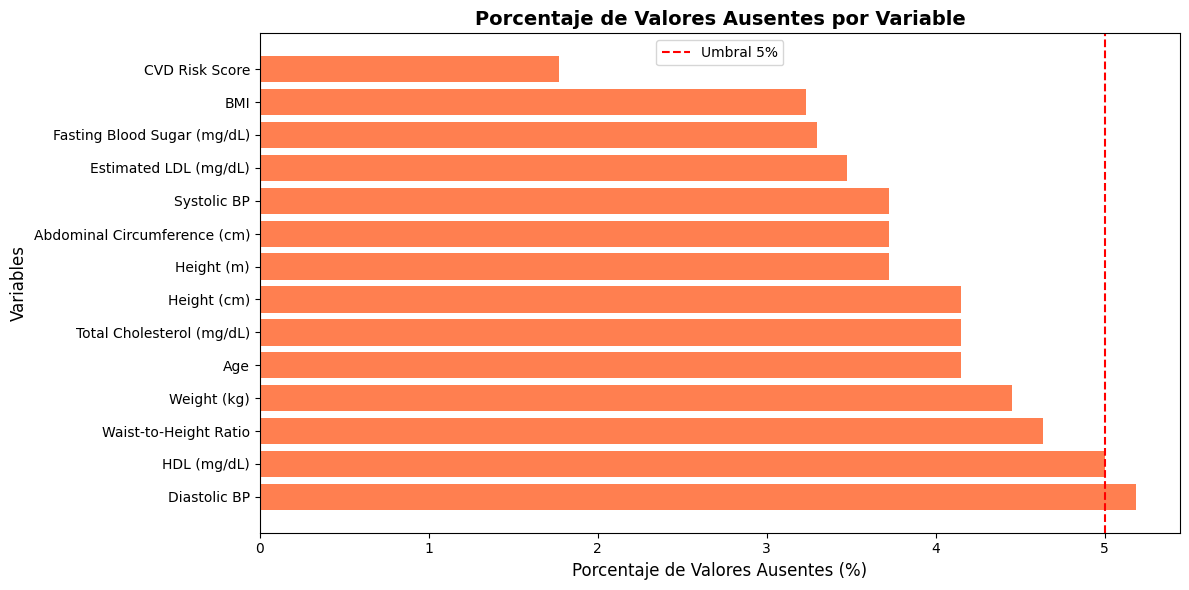


────────────────────────────────────────────────────────────────────────────────
📋 Clasificación por severidad:
────────────────────────────────────────────────────────────────────────────────

🟡 MODERADO (5-10%): 2 variables
     Columna  Porcentaje (%)
Diastolic BP        5.186089
 HDL (mg/dL)        5.003051

🟢 LEVE (<5%): 12 variables
                     Columna  Porcentaje (%)
       Waist-to-Height Ratio        4.636974
                 Weight (kg)        4.453935
                         Age        4.148871
   Total Cholesterol (mg/dL)        4.148871
                 Height (cm)        4.148871
                  Height (m)        3.721782
Abdominal Circumference (cm)        3.721782
                 Systolic BP        3.721782
       Estimated LDL (mg/dL)        3.477730
 Fasting Blood Sugar (mg/dL)        3.294692
                         BMI        3.233679
              CVD Risk Score        1.769372




In [5]:
# 2.1 Valores ausentes

print("="*80)
print(" "*25 + "🔍 ANÁLISIS DE VALORES AUSENTES")
print("="*80 + "\n")

# Calcular valores ausentes
valores_ausentes = df.isnull().sum()
porcentaje_ausentes = (df.isnull().sum() / len(df)) * 100

# Crear DataFrame con el resumen
resumen_ausentes = pd.DataFrame({
    'Columna': valores_ausentes.index,
    'Valores Ausentes': valores_ausentes.values,
    'Porcentaje (%)': porcentaje_ausentes.values
})

# Filtrar solo las columnas con valores ausentes
resumen_ausentes = resumen_ausentes[resumen_ausentes['Valores Ausentes'] > 0].sort_values(
    by='Valores Ausentes', ascending=False
).reset_index(drop=True)

print(f"📊 Total de columnas con valores ausentes: {len(resumen_ausentes)} de {df.shape[1]}")
print(f"📊 Total de valores ausentes en el dataset: {valores_ausentes.sum():,}\n")

# Mostrar resumen de valores ausentes
if len(resumen_ausentes) > 0:
    print(resumen_ausentes.to_string(index=False))
    
    # Visualización
    plt.figure(figsize=(12, 6))
    plt.barh(resumen_ausentes['Columna'], resumen_ausentes['Porcentaje (%)'], color='coral')
    plt.xlabel('Porcentaje de Valores Ausentes (%)', fontsize=12)
    plt.ylabel('Variables', fontsize=12)
    plt.title('Porcentaje de Valores Ausentes por Variable', fontsize=14, fontweight='bold')
    plt.axvline(x=5, color='red', linestyle='--', label='Umbral 5%')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Clasificar según severidad
    print("\n" + "─"*80)
    print("📋 Clasificación por severidad:")
    print("─"*80)
    
    # Clasificación de variables según porcentaje de valores ausentes
    critico = resumen_ausentes[resumen_ausentes['Porcentaje (%)'] > 10]
    moderado = resumen_ausentes[(resumen_ausentes['Porcentaje (%)'] >= 5) & 
                                (resumen_ausentes['Porcentaje (%)'] <= 10)]
    leve = resumen_ausentes[resumen_ausentes['Porcentaje (%)'] < 5]
    
    
    if len(critico) > 0:
        print(f"\n🔴 CRÍTICO (>10%): {len(critico)} variables")
        print(critico[['Columna', 'Porcentaje (%)']].to_string(index=False))
    
    if len(moderado) > 0:
        print(f"\n🟡 MODERADO (5-10%): {len(moderado)} variables")
        print(moderado[['Columna', 'Porcentaje (%)']].to_string(index=False))
    
    if len(leve) > 0:
        print(f"\n🟢 LEVE (<5%): {len(leve)} variables")
        print(leve[['Columna', 'Porcentaje (%)']].to_string(index=False))
else:
    print("✅ No se encontraron valores ausentes en el dataset")

print("\n" + "="*80 + "\n")

**Impacto de los valores ausentes:**

Se identificaron **896 valores ausentes** en **14 de 24 variables** (58.3% de las columnas):

- **MODERADO (5-10%)**: Diastolic BP (5.19%) y HDL (5.00%)
- **LEVE (<5%)**: 12 variables incluyendo Weight, Age, Height, Cholesterol, etc.
- **Variable objetivo (CVD Risk Score)**: 29 ausentes (1.77%) - crítico para el modelo

El porcentaje de ausencia es manejable en todas las variables (<6%). No se observa ausencia crítica que requiera eliminación de variables completas.

**Decisiones propuestas:**

- **Variables con 5-10% ausentes**: Imputación por mediana agrupada por edad y sexo
- **Variables con <5% ausentes**: Imputación por mediana 
- **CVD Risk Score (variable objetivo)**: Eliminar los 29 registros sin etiqueta (solo 1.77% del dataset)
- **Estrategia**: Usar SimpleImputer de sklearn con estrategia 'median' para todas las variables numéricas
- **Validación**: Verificar que las distribuciones no se distorsionen significativamente post-imputación

### 2.2 Valores duplicados

**Análisis de registros duplicados:**

Se verificará la existencia de registros duplicados en el dataset que puedan afectar el entrenamiento del modelo.

**Criterios de evaluación:**
- Duplicados completos: registros idénticos en todas las columnas
- Duplicados por Patient ID: pacientes que aparecen múltiples veces
- Análisis contextual: determinar si los duplicados son errores o mediciones legítimas en diferentes fechas

In [6]:
# 2.2 Valores duplicados

print("="*80)
print(" "*25 + "🔍 ANÁLISIS DE VALORES DUPLICADOS")
print("="*80 + "\n")

# Verificar duplicados completos
duplicados_completos = df.duplicated().sum()
print(f"📊 Registros duplicados (completos): {duplicados_completos}")

if duplicados_completos > 0:
    print(f"   Porcentaje del total: {(duplicados_completos / len(df)) * 100:.2f}%")
    print("\n🔎 Primeros registros duplicados:")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head(10))

# Verificar duplicados por Patient ID
if 'Patient ID' in df.columns:
    duplicados_id = df['Patient ID'].duplicated().sum()
    print(f"\n📊 Patient IDs duplicados: {duplicados_id}")
    
    if duplicados_id > 0:
        print(f"   Porcentaje del total: {(duplicados_id / len(df)) * 100:.2f}%")
        
        # Mostrar algunos ejemplos de IDs duplicados
        ids_duplicados = df[df['Patient ID'].duplicated(keep=False)]['Patient ID'].unique()
        print(f"\n🔎 Ejemplos de Patient IDs que aparecen múltiples veces:")
        for patient_id in ids_duplicados[:5]:
            registros = df[df['Patient ID'] == patient_id]
            print(f"\n   Patient ID: {patient_id} - Aparece {len(registros)} veces")
            if 'Date of Service' in df.columns:
                print(f"   Fechas: {registros['Date of Service'].tolist()}")

print("\n" + "─"*80)
print("💡 Decisión:")
if duplicados_completos == 0 and duplicados_id == 0:
    print("✅ No se encontraron duplicados. No se requiere acción.")
elif duplicados_completos > 0:
    print("⚠️  Se encontraron registros duplicados completos.")
    print("   Acción recomendada: Eliminar duplicados completos en la fase de preparación.")
elif duplicados_id > 0:
    print("⚠️  Se encontraron Patient IDs duplicados con diferentes datos.")
    print("   Acción recomendada: Analizar contexto (fechas) y mantener registro más reciente.")
print("─"*80)

print("\n" + "="*80 + "\n")

                         🔍 ANÁLISIS DE VALORES DUPLICADOS

📊 Registros duplicados (completos): 151
   Porcentaje del total: 9.21%

🔎 Primeros registros duplicados:
     Patient ID Date of Service Sex   Age  Weight (kg)  Height (m)   BMI  \
17     AhYt1346      09-28-2020   M  41.0         71.3        1.73  23.8   
1584   AhYt1346      09-28-2020   M  41.0         71.3        1.73  23.8   
130    BQvQ6431      09/11/2020   M  33.0        118.3        1.69  41.4   
1544   BQvQ6431      09/11/2020   M  33.0        118.3        1.69  41.4   
1241   CDsa2651      23/06/2025   M  39.0         73.3        1.74  24.2   
1566   CDsa2651      23/06/2025   M  39.0         73.3        1.74  24.2   
546    CKKa5109  March 18, 2023   M  51.0         85.9        1.78  27.1   
862    CKKa5109  March 18, 2023   M  51.0         85.9        1.78  27.1   
999    CYeS2965       26 Jul 25   M  33.0        108.7        1.86   NaN   
1118   CYeS2965       26 Jul 25   M  33.0        108.7        1.86   NaN   


**Decisión:**

Se detectaron **151 registros duplicados completos** (9.21% del dataset). Estos son registros idénticos en todas las columnas, incluyendo Patient ID, Date of Service y todas las mediciones.

**Análisis:**
- Los duplicados corresponden al mismo paciente, misma fecha y valores idénticos en todas las variables
- Estos son claramente errores de carga de datos o duplicaciones del sistema
- **No aportan información adicional** y pueden sesgar el modelo al sobrerrepresentar ciertos pacientes

**Acción a tomar:**
- **Eliminar duplicados completos** manteniendo solo la primera ocurrencia de cada registro
- Esto reducirá el dataset de 1,639 a 1,488 registros únicos
- La eliminación se realizará en la fase de preparación usando `df.drop_duplicates()`

### 2.3 Valores atípicos (outliers)

**Detección de outliers:**

Se identificarán valores atípicos mediante análisis estadístico y visualización con boxplots para las variables numéricas principales.

**Métodos de detección:**
- Análisis contextual: determinar si son errores de medición o casos médicos extremos pero válidos

**Variables críticas a analizar:** Age (edad de 6 años parece inusual), BMI (valores de 4.32 y 53.03 son extremos), Total Cholesterol (valor negativo de -1.26 es imposible), HDL (valor de 0.008 parece error de medición), Estimated LDL (valores negativos como -92.06 son imposibles), CVD Risk Score (valores negativos como -20.06 requieren investigación) y por ultimo Blood Pressure (valores extremos que podrían ser errores)

In [7]:
# 2.3 Valores atípicos (outliers)

print("="*80)
print(" "*25 + "🔍 ANÁLISIS DE VALORES ATÍPICOS (OUTLIERS)")
print("="*80 + "\n")

# Seleccionar solo variables numéricas relevantes (excluyendo IDs)
numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Variables críticas para analizar outliers
variables_criticas = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 
                      'Total Cholesterol (mg/dL)', 'HDL (mg/dL)', 
                      'Estimated LDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)',
                      'Systolic BP', 'Diastolic BP', 'CVD Risk Score']

# Filtrar solo las que existen en el dataset
variables_analizar = [var for var in variables_criticas if var in numericas]

print(f"📊 Analizando {len(variables_analizar)} variables numéricas clave\n")

# Función para detectar outliers usando IQR
def detectar_outliers_iqr(data, columna):
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[columna] < lower_bound) | (data[columna] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Análisis por variable
resumen_outliers = []

for var in variables_analizar:
    outliers, lower, upper = detectar_outliers_iqr(df, var)
    n_outliers = len(outliers)
    porcentaje = (n_outliers / len(df)) * 100
    
    # Detectar valores imposibles (negativos donde no deberían existir)
    valores_negativos = (df[var] < 0).sum()
    
    resumen_outliers.append({
        'Variable': var,
        'N° Outliers': n_outliers,
        'Porcentaje (%)': round(porcentaje, 2),
        'Valores Negativos': valores_negativos,
        'Límite Inferior': round(lower, 2),
        'Límite Superior': round(upper, 2),
        'Min Real': round(df[var].min(), 2),
        'Max Real': round(df[var].max(), 2)
    })

df_outliers = pd.DataFrame(resumen_outliers)
print(df_outliers.to_string(index=False))

# Identificar variables con valores imposibles
print("\n" + "─"*80)
print("⚠️  VALORES IMPOSIBLES DETECTADOS (negativos donde no deberían existir):")
print("─"*80)

valores_imposibles = df_outliers[df_outliers['Valores Negativos'] > 0]
if len(valores_imposibles) > 0:
    print(valores_imposibles[['Variable', 'Valores Negativos', 'Min Real']].to_string(index=False))
    print("\n🔴 Estos valores requieren tratamiento OBLIGATORIO (imputación o eliminación)")
else:
    print("✅ No se detectaron valores imposibles")

print("\n" + "="*80 + "\n")

                         🔍 ANÁLISIS DE VALORES ATÍPICOS (OUTLIERS)

📊 Analizando 11 variables numéricas clave

                   Variable  N° Outliers  Porcentaje (%)  Valores Negativos  Límite Inferior  Límite Superior  Min Real  Max Real
                        Age           15            0.92                  0            10.00            82.00      6.13     89.42
                Weight (kg)            0            0.00                  0            10.55           161.35     13.26    158.52
                 Height (m)            8            0.49                  0             1.39             2.13      1.37      2.15
                        BMI           11            0.67                  0             5.56            51.01      4.32     53.03
  Total Cholesterol (mg/dL)            1            0.06                  1             0.00           400.00     -1.26    385.68
                HDL (mg/dL)            0            0.00                  0             0.00           112.00

**Decisiones propuestas:**

**Valores imposibles (tratamiento obligatorio):**
- **Total Cholesterol** (1 negativo), **Estimated LDL** (16 negativos), **CVD Risk Score** (9 negativos) → Imputar por mediana

**Outliers extremos pero válidos:**
- **Age, BMI, Blood Pressure, Fasting Blood Sugar** → Mantener, son casos médicos reales (bajo peso, obesidad mórbida, hipertensión, diabetes)

**Estrategia:**
- Imputar valores imposibles (~26 registros, 1.6%)
- Mantener outliers biológicamente posibles sin transformación

A continuación se ve una visualización de los outliers para cada columna:

📊 VISUALIZACIÓN DE OUTLIERS



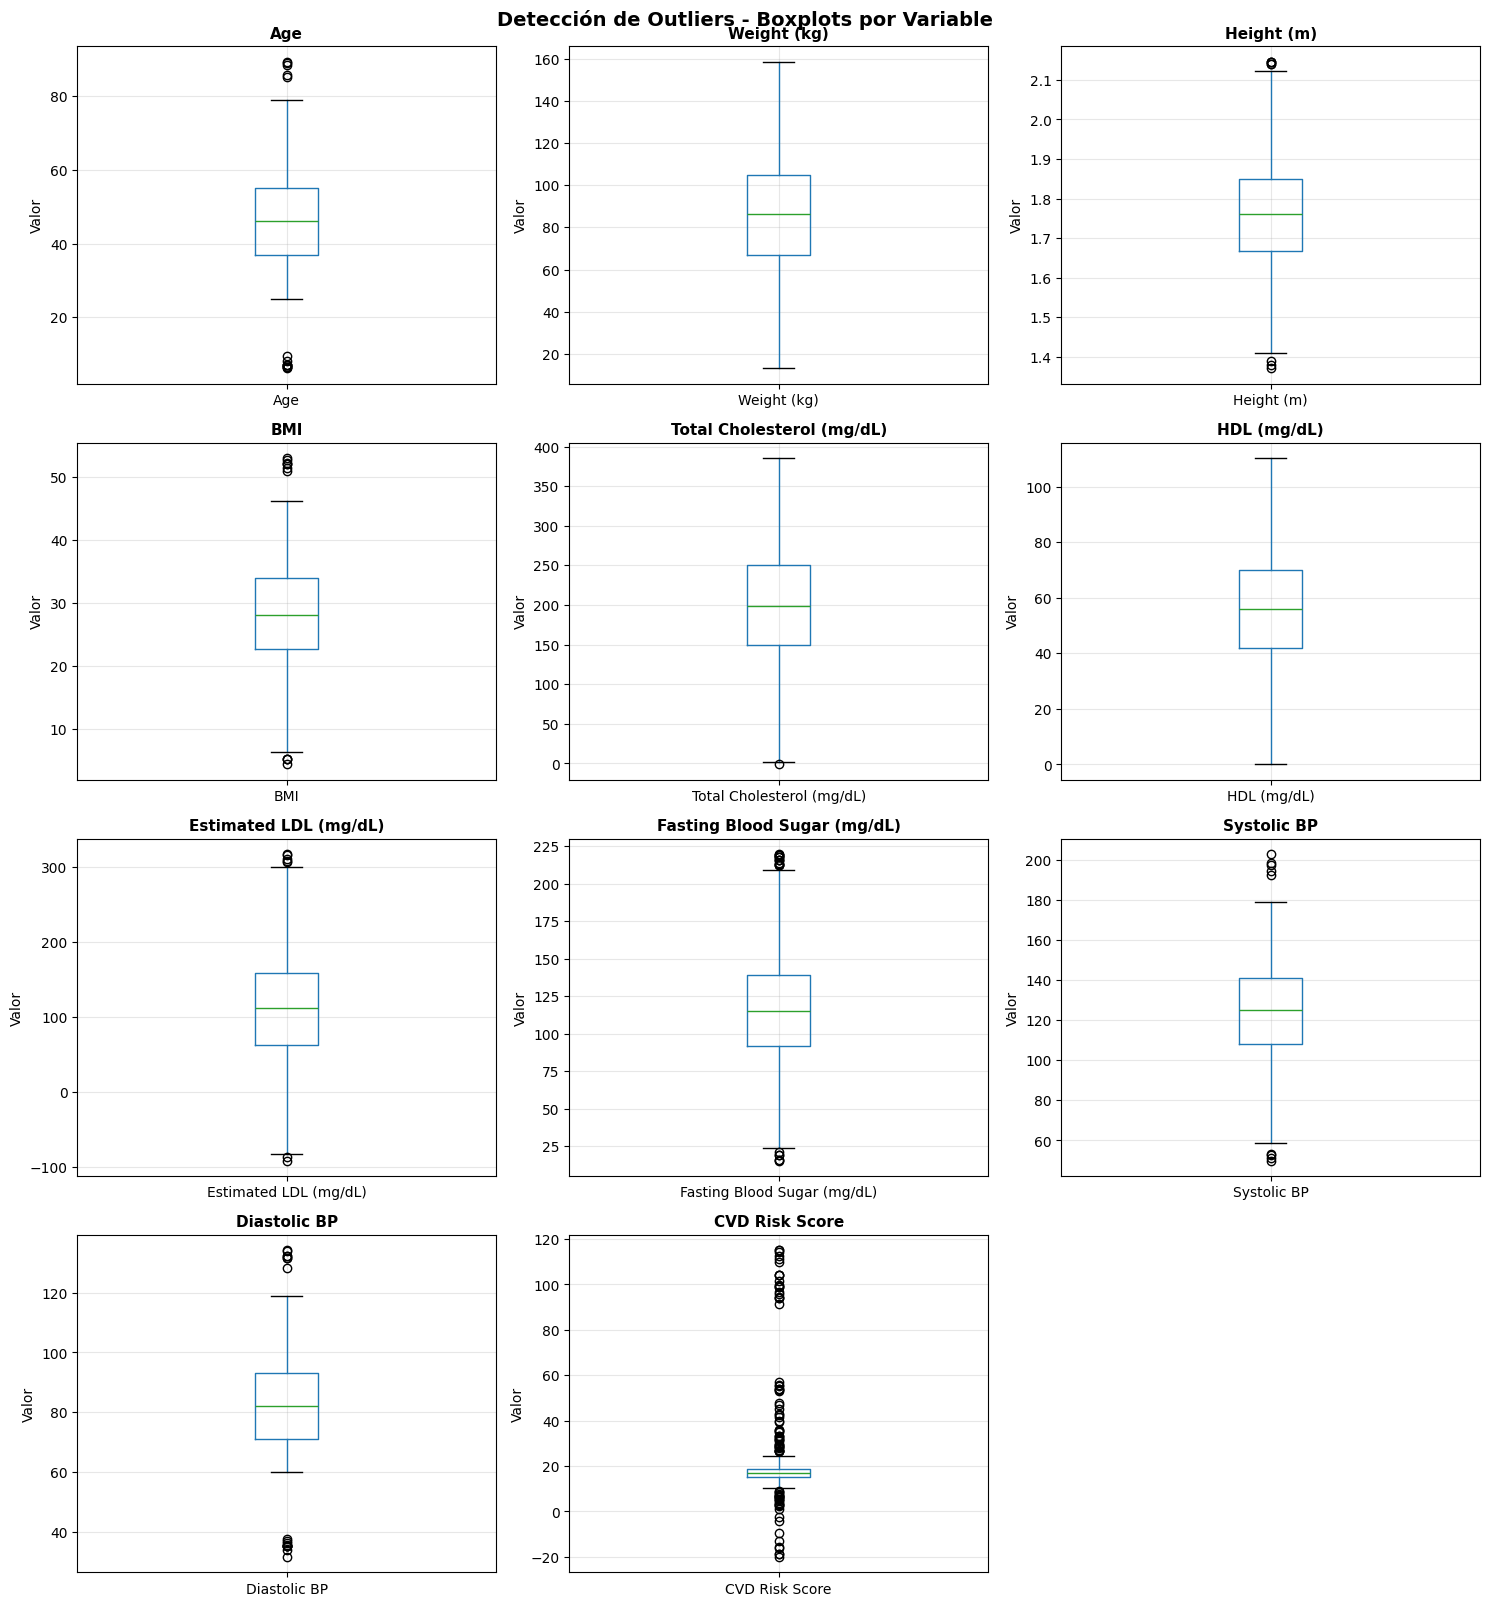

In [8]:
# Visualización de outliers con boxplots

print("📊 VISUALIZACIÓN DE OUTLIERS\n")

# Crear subplots para las variables más importantes
n_vars = len(variables_analizar)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_vars > 1 else [axes]

for idx, var in enumerate(variables_analizar):
    ax = axes[idx]
    df.boxplot(column=var, ax=ax, vert=True)
    ax.set_title(f'{var}', fontsize=11, fontweight='bold')
    ax.set_ylabel('Valor', fontsize=10)
    ax.grid(True, alpha=0.3)

# Ocultar subplots vacíos
for idx in range(n_vars, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Detección de Outliers - Boxplots por Variable', 
             fontsize=14, fontweight='bold', y=1.001)
plt.show()

print("\n" + "="*80)

## 2.4 Análisis de Correlaciones

**Motivación:**
Antes de proceder con la construcción de modelos, se realiza un análisis de correlaciones para identificar qué variables tienen mayor relación con CVD Risk Score y comprender las relaciones lineales en los datos.

**Metodología:**
Se calcularon las correlaciones de Pearson entre todas las variables numéricas y la variable objetivo CVD Risk Score, utilizando los datos originales (antes de escalar).

In [23]:
# ============================================================================
# 2.4 Análisis de Correlaciones
# ============================================================================

print("="*80)
print(" "*20 + "🔍 ANÁLISIS DE CORRELACIONES CON CVD RISK SCORE")
print("="*80 + "\n")

# ============================================================================
# USAR EL df ORIGINAL QUE YA CARGASTE
# ============================================================================

# df es el DataFrame original que cargaste al inicio del notebook
# Hacer una copia para no modificar el original
df_para_corr = df.copy()

# Aplicar la misma limpieza que hiciste en preparación
df_para_corr = df_para_corr.drop_duplicates()
df_para_corr = df_para_corr.dropna(subset=['CVD Risk Score'])

# Filtrar CVD Risk Score válido (0-50)
df_para_corr = df_para_corr[
    (df_para_corr['CVD Risk Score'] >= 0) & 
    (df_para_corr['CVD Risk Score'] <= 50)
]

print(f"📊 Dataset para correlaciones: {df_para_corr.shape[0]} registros × {df_para_corr.shape[1]} columnas\n")

# Seleccionar SOLO variables numéricas
df_correlacion = df_para_corr.select_dtypes(include=['float64', 'int64']).copy()

print(f"📊 Variables numéricas: {len(df_correlacion.columns)}\n")

# Calcular correlaciones con CVD Risk Score
correlaciones = df_correlacion.corr()['CVD Risk Score'].sort_values(ascending=False)

# ============================================================================
# MOSTRAR CORRELACIONES
# ============================================================================

print("📊 Correlación de cada variable con CVD Risk Score:\n")
print("─"*80)

for i, (variable, corr) in enumerate(correlaciones.items(), 1):
    if variable != 'CVD Risk Score':
        if abs(corr) > 0.7:
            fuerza = "🔴 MUY FUERTE"
        elif abs(corr) > 0.5:
            fuerza = "🟠 FUERTE"
        elif abs(corr) > 0.3:
            fuerza = "🟡 MODERADA"
        elif abs(corr) > 0.1:
            fuerza = "🟢 DÉBIL"
        else:
            fuerza = "⚪ MUY DÉBIL"
        
        print(f"{i:2d}. {variable:35s} | {corr:+.4f} | {fuerza}")

print("─"*80)

# Top 10 variables
print("\n🎯 TOP 10 VARIABLES MÁS CORRELACIONADAS (en valor absoluto):\n")
top_10 = correlaciones.drop('CVD Risk Score').abs().sort_values(ascending=False).head(10)

for i, (variable, corr_abs) in enumerate(top_10.items(), 1):
    corr_real = correlaciones[variable]
    print(f"{i:2d}. {variable:35s} | {corr_real:+.4f}")

print("\n💡 Observación:")
print(f"   La correlación más alta es {top_10.max():.4f}")

print("\n" + "="*80 + "\n")

                    🔍 ANÁLISIS DE CORRELACIONES CON CVD RISK SCORE

📊 Dataset para correlaciones: 1427 registros × 24 columnas

📊 Variables numéricas: 14

📊 Correlación de cada variable con CVD Risk Score:

────────────────────────────────────────────────────────────────────────────────
 2. Total Cholesterol (mg/dL)           | +0.3379 | 🟡 MODERADA
 3. BMI                                 | +0.3063 | 🟡 MODERADA
 4. Estimated LDL (mg/dL)               | +0.2922 | 🟢 DÉBIL
 5. Systolic BP                         | +0.2768 | 🟢 DÉBIL
 6. Weight (kg)                         | +0.2328 | 🟢 DÉBIL
 7. Waist-to-Height Ratio               | +0.0689 | ⚪ MUY DÉBIL
 8. Diastolic BP                        | +0.0684 | ⚪ MUY DÉBIL
 9. Abdominal Circumference (cm)        | +0.0579 | ⚪ MUY DÉBIL
10. Fasting Blood Sugar (mg/dL)         | +0.0434 | ⚪ MUY DÉBIL
11. Age                                 | +0.0164 | ⚪ MUY DÉBIL
12. HDL (mg/dL)                         | +0.0016 | ⚪ MUY DÉBIL
13. Height (m)        

📊 MAPA DE CALOR - CORRELACIONES



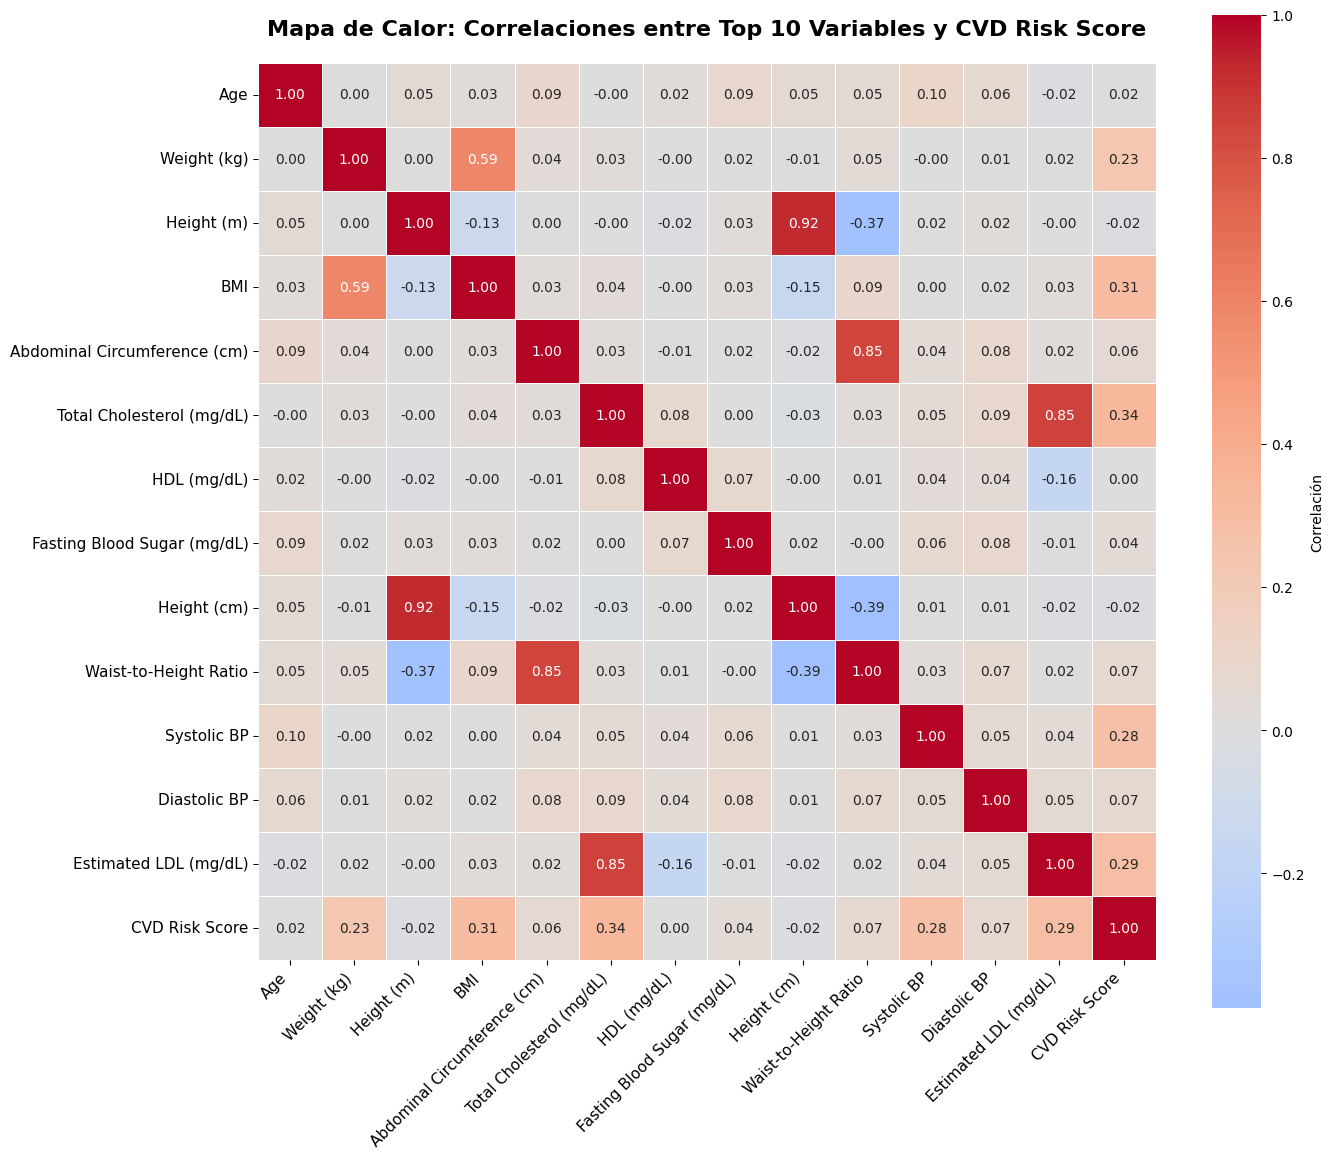

✅ Mapa de calor generado




In [27]:
# ============================================================================
# MAPA DE CALOR - CORRELACIONES
# ============================================================================

print("📊 MAPA DE CALOR - CORRELACIONES\n")

# Seleccionar top 10 + CVD Risk Score
top_vars = top_10.index.tolist() + ['CVD Risk Score']
df_top_vars = df_correlacion[top_vars]

# Calcular matriz de correlación
corr_matrix = df_top_vars.corr()

# Crear figura
fig, ax = plt.subplots(figsize=(14, 12))

# Heatmap
# Heatmap simple y limpio
sns.heatmap(df_correlacion.corr(), 
            annot=True,              # Mostrar valores
            fmt='.2f',               # 2 decimales
            cmap='coolwarm',         # Colores rojo-azul
            center=0,                # Centrar en 0
            square=True,             # Celdas cuadradas
            linewidths=0.5,          # Líneas delgadas
            cbar_kws={"label": "Correlación"})

plt.title('Mapa de Calor: Correlaciones entre Top 10 Variables y CVD Risk Score', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

print("✅ Mapa de calor generado")
print("\n" + "="*80 + "\n")

# Preparación de Datos

## 1. División de datos (Train-Test Split)

Según las especificaciones del laboratorio, se realizará la división del dataset con los siguientes parámetros:
- `test_size = 0.25` (25% para test, 75% para entrenamiento)
- `random_state = 42` (para reproducibilidad)

**Justificación:**
- La división se realiza ANTES de cualquier transformación para evitar data leakage
- Se eliminarán los registros con valores ausentes en la variable objetivo (CVD Risk Score)


In [11]:
# ============================================================================
# PREPARACIÓN DE DATOS
# ============================================================================

print("="*80)
print(" "*25 + "🔧 PREPARACIÓN DE DATOS")
print("="*80 + "\n")

# ============================================================================
# 1. División de datos (Train-Test Split)
# ============================================================================

print("─"*80)
print("📊 PASO 1: División Train-Test Split")
print("─"*80 + "\n")

# Primero, eliminamos duplicados completos
print("🔹 Eliminando duplicados completos...")
df_clean = df.drop_duplicates()
duplicados_eliminados = len(df) - len(df_clean)
print(f"   ✅ Duplicados eliminados: {duplicados_eliminados}")
print(f"   📊 Registros restantes: {len(df_clean)}\n")

# Eliminamos registros sin variable objetivo (CVD Risk Score)
print("🔹 Eliminando registros sin variable objetivo (CVD Risk Score)...")
registros_antes = len(df_clean)
df_clean = df_clean.dropna(subset=['CVD Risk Score'])
registros_sin_target = registros_antes - len(df_clean)
print(f"   ✅ Registros sin objetivo eliminados: {registros_sin_target}")
print(f"   📊 Registros restantes: {len(df_clean)}\n")

# Separar características (X) y variable objetivo (y)
print("🔹 Separando características (X) y variable objetivo (y)...")

# Eliminar columnas que no son predictoras
columnas_eliminar = ['Patient ID', 'Date of Service', 'CVD Risk Score']
X = df_clean.drop(columns=columnas_eliminar)
y = df_clean['CVD Risk Score']

print(f"   ✅ Características (X): {X.shape[1]} variables")
print(f"   ✅ Variable objetivo (y): {len(y)} registros\n")

# División train-test con los parámetros especificados
print("🔹 Dividiendo datos en entrenamiento (75%) y prueba (25%)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42
)

print(f"   ✅ Conjunto de entrenamiento:")
print(f"      - X_train: {X_train.shape[0]} filas × {X_train.shape[1]} columnas")
print(f"      - y_train: {y_train.shape[0]} valores")
print(f"\n   ✅ Conjunto de prueba:")
print(f"      - X_test: {X_test.shape[0]} filas × {X_test.shape[1]} columnas")
print(f"      - y_test: {y_test.shape[0]} valores")

print("\n" + "="*80 + "\n")

                         🔧 PREPARACIÓN DE DATOS

────────────────────────────────────────────────────────────────────────────────
📊 PASO 1: División Train-Test Split
────────────────────────────────────────────────────────────────────────────────

🔹 Eliminando duplicados completos...
   ✅ Duplicados eliminados: 151
   📊 Registros restantes: 1488

🔹 Eliminando registros sin variable objetivo (CVD Risk Score)...
   ✅ Registros sin objetivo eliminados: 28
   📊 Registros restantes: 1460

🔹 Separando características (X) y variable objetivo (y)...
   ✅ Características (X): 21 variables
   ✅ Variable objetivo (y): 1460 registros

🔹 Dividiendo datos en entrenamiento (75%) y prueba (25%)...
   ✅ Conjunto de entrenamiento:
      - X_train: 1095 filas × 21 columnas
      - y_train: 1095 valores

   ✅ Conjunto de prueba:
      - X_test: 365 filas × 21 columnas
      - y_test: 365 valores




## 2. Tratamiento de valores ausentes y valores imposibles

**Análisis de valores ausentes:**

Se identificaron valores ausentes en 13 de 21 variables en el conjunto de entrenamiento:
- **HDL (mg/dL)**: 54 valores (4.93%)
- **Weight (kg)**: 51 valores (4.66%)
- **Diastolic BP**: 51 valores (4.66%)
- **Total Cholesterol (mg/dL)**: 50 valores (4.57%)
- Otras 9 variables con porcentajes menores

**Tratamiento de valores imposibles:**
Se detectaron valores negativos (biológicamente imposibles) en:
- **Total Cholesterol (mg/dL)**: valores negativos
- **Estimated LDL (mg/dL)**: valores negativos

Estos valores fueron marcados como NaN para ser imputados junto con los demás valores ausentes.

**Estrategia de imputación aplicada:**
- **Variables numéricas** (13 variables): Imputación por **mediana** usando `SimpleImputer`
- **Variables categóricas** (8 variables): Imputación por **moda** (valor más frecuente)
- Imputadores ajustados SOLO con datos de entrenamiento y aplicados a train y test

**Resultado:**
- Train: 0 valores ausentes
- Test: 0 valores ausentes
- ✅ Todos los valores ausentes tratados correctamente

**Justificación:**
- Mediana es robusta ante outliers (mejor que media para datos con valores extremos)
- Ajustar imputadores solo con train evita data leakage
- Tratamiento de valores imposibles antes de imputar asegura datos válidos


In [12]:
# ============================================================================
# 2. Tratamiento de valores ausentes
# ============================================================================

print("─"*80)
print("📊 PASO 2: Tratamiento de Valores Ausentes")
print("─"*80 + "\n")

# Verificar valores ausentes en train
print("🔹 Valores ausentes en conjunto de entrenamiento:")
valores_ausentes_train = X_train.isnull().sum()
valores_ausentes_train = valores_ausentes_train[valores_ausentes_train > 0].sort_values(ascending=False)

if len(valores_ausentes_train) > 0:
    print(f"\n   Total de columnas con valores ausentes: {len(valores_ausentes_train)}")
    for col, count in valores_ausentes_train.items():
        porcentaje = (count / len(X_train)) * 100
        print(f"   • {col}: {count} ({porcentaje:.2f}%)")
else:
    print("   ✅ No hay valores ausentes")

# Identificar columnas numéricas y categóricas
columnas_numericas = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
columnas_categoricas = X_train.select_dtypes(include=['object']).columns.tolist()

print(f"\n🔹 Identificación de tipos de variables:")
print(f"   • Variables numéricas: {len(columnas_numericas)}")
print(f"   • Variables categóricas: {len(columnas_categoricas)}")

# Tratamiento de valores imposibles (negativos) ANTES de imputar
print(f"\n🔹 Tratamiento de valores imposibles (negativos):")

variables_verificar = ['Total Cholesterol (mg/dL)', 'Estimated LDL (mg/dL)']
valores_corregidos = 0

for var in variables_verificar:
    if var in columnas_numericas:
        negativos_train = (X_train[var] < 0).sum()
        negativos_test = (X_test[var] < 0).sum()
        
        if negativos_train > 0 or negativos_test > 0:
            print(f"   • {var}:")
            print(f"     - Train: {negativos_train} valores negativos")
            print(f"     - Test: {negativos_test} valores negativos")
            
            # Reemplazar negativos por NaN para que sean imputados
            X_train.loc[X_train[var] < 0, var] = np.nan
            X_test.loc[X_test[var] < 0, var] = np.nan
            valores_corregidos += negativos_train + negativos_test

if valores_corregidos > 0:
    print(f"   ✅ Total de valores imposibles marcados para imputación: {valores_corregidos}")
else:
    print(f"   ✅ No se encontraron valores imposibles")

# Imputación de valores ausentes en variables numéricas
print(f"\n🔹 Aplicando imputación por mediana en variables numéricas...")

from sklearn.impute import SimpleImputer

# Crear imputador (se ajusta solo con datos de entrenamiento)
imputer_num = SimpleImputer(strategy='median')

# Ajustar con train y transformar train y test
X_train[columnas_numericas] = imputer_num.fit_transform(X_train[columnas_numericas])
X_test[columnas_numericas] = imputer_num.transform(X_test[columnas_numericas])

print(f"   ✅ Imputación completada en {len(columnas_numericas)} variables numéricas")

# Imputación de valores ausentes en variables categóricas (si existen)
if len(columnas_categoricas) > 0:
    print(f"\n🔹 Aplicando imputación por moda en variables categóricas...")
    
    imputer_cat = SimpleImputer(strategy='most_frequent')
    X_train[columnas_categoricas] = imputer_cat.fit_transform(X_train[columnas_categoricas])
    X_test[columnas_categoricas] = imputer_cat.transform(X_test[columnas_categoricas])
    
    print(f"   ✅ Imputación completada en {len(columnas_categoricas)} variables categóricas")

# Verificación final
print(f"\n🔹 Verificación final de valores ausentes:")
ausentes_train_final = X_train.isnull().sum().sum()
ausentes_test_final = X_test.isnull().sum().sum()

print(f"   • Train: {ausentes_train_final} valores ausentes")
print(f"   • Test: {ausentes_test_final} valores ausentes")

if ausentes_train_final == 0 and ausentes_test_final == 0:
    print(f"   ✅ Todos los valores ausentes han sido tratados correctamente")

────────────────────────────────────────────────────────────────────────────────
📊 PASO 2: Tratamiento de Valores Ausentes
────────────────────────────────────────────────────────────────────────────────

🔹 Valores ausentes en conjunto de entrenamiento:

   Total de columnas con valores ausentes: 13
   • HDL (mg/dL): 54 (4.93%)
   • Weight (kg): 51 (4.66%)
   • Diastolic BP: 51 (4.66%)
   • Total Cholesterol (mg/dL): 50 (4.57%)
   • Height (m): 49 (4.47%)
   • Waist-to-Height Ratio: 49 (4.47%)
   • Age: 44 (4.02%)
   • Abdominal Circumference (cm): 43 (3.93%)
   • Height (cm): 43 (3.93%)
   • Systolic BP: 42 (3.84%)
   • Estimated LDL (mg/dL): 36 (3.29%)
   • Fasting Blood Sugar (mg/dL): 35 (3.20%)
   • BMI: 32 (2.92%)

🔹 Identificación de tipos de variables:
   • Variables numéricas: 13
   • Variables categóricas: 8

🔹 Tratamiento de valores imposibles (negativos):
   • Total Cholesterol (mg/dL):
     - Train: 1 valores negativos
     - Test: 0 valores negativos
   • Estimated LDL (mg

## 3. Codificación de variables categóricas y escalado

**Eliminación de variables redundantes:**
- **Blood Pressure (mmHg)** eliminada (909 categorías únicas, redundante con Systolic BP y Diastolic BP numéricos)

**Variables categóricas codificadas (7):**

| Variable | Categorías → Valores numéricos |
|----------|-------------------------------|
| Sex | M→1, F→0 |
| Smoking Status | Y→1, N→0 |
| Diabetes Status | Y→1, N→0 |
| Physical Activity Level | Low→0, Moderate→1, High→2 |
| Family History of CVD | Y→1, N→0 |
| Blood Pressure Category | Normal→0, Elevated→1, Hypertension Stage 1→2, Hypertension Stage 2→3 |
| CVD Risk Level | Low→0, Moderate→1, High→2 |

**Escalado:** StandardScaler normaliza todas las 20 variables (13 numéricas + 7 codificadas) a media=0, std=1

**Resultado:**
- X_train: 1,095 × 20 columnas | X_test: 365 × 20 columnas

**Justificación:** LabelEncoder permite usar variables categóricas en regresión lineal. StandardScaler evita que variables de gran escala (ej: Cholesterol 0-400) dominen sobre variables pequeñas (ej: Height 1.3-2.1). Ajustar transformaciones solo con train previene data leakage.

In [13]:
# ============================================================================
# 3. Codificación de variables categóricas y escalado
# ============================================================================

print("─"*80)
print("📊 PASO 3: Codificación de Variables Categóricas y Escalado")
print("─"*80 + "\n")

# Identificar variables categóricas REALES (con pocas categorías únicas)
print("🔹 Analizando variables categóricas...")

columnas_cat_reales = []
columnas_cat_excluidas = []

for col in columnas_categoricas:
    n_unique = X_train[col].nunique()
    if n_unique <= 10:  # Solo si tiene 10 o menos categorías únicas
        columnas_cat_reales.append(col)
        print(f"   ✅ {col}: {n_unique} categorías únicas - SE CODIFICARÁ")
    else:
        columnas_cat_excluidas.append(col)
        print(f"   ⚠️  {col}: {n_unique} categorías únicas - SE EXCLUIRÁ (demasiadas categorías)")

# Eliminar columnas categóricas con demasiadas categorías
if columnas_cat_excluidas:
    print(f"\n🔹 Eliminando {len(columnas_cat_excluidas)} columnas con demasiadas categorías...")
    X_train = X_train.drop(columns=columnas_cat_excluidas)
    X_test = X_test.drop(columns=columnas_cat_excluidas)
    print(f"   Columnas eliminadas: {columnas_cat_excluidas}")

# Codificación de variables categóricas REALES
print(f"\n🔹 Aplicando codificación a {len(columnas_cat_reales)} variables categóricas...")

from sklearn.preprocessing import LabelEncoder

# Crear copia para evitar warnings
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Diccionario para guardar los encoders
encoders = {}

for col in columnas_cat_reales:
    le = LabelEncoder()
    
    # Ajustar con train
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col].astype(str))
    
    # Transformar test, manejando valores nuevos
    # Si hay valores en test que no están en train, los mapeamos a -1
    test_values = X_test_encoded[col].astype(str)
    X_test_encoded[col] = test_values.map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    
    # Guardar el encoder
    encoders[col] = le
    
    print(f"   ✅ {col}: {len(le.classes_)} categorías codificadas")

print(f"\n   Total: {len(columnas_cat_reales)} variables categóricas codificadas")

# Escalado de TODAS las variables
print(f"\n🔹 Aplicando StandardScaler a todas las variables...")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajustar con train y transformar train y test
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Convertir de nuevo a DataFrame
X_train_final = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns, index=X_train_encoded.index)
X_test_final = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns, index=X_test_encoded.index)

print(f"   ✅ Escalado completado en {len(X_train_final.columns)} variables")

# Mostrar estadísticas después del escalado
print(f"\n🔹 Verificación de escalado (Train):")
print(f"   • Media: {X_train_final.mean().mean():.10f} (≈ 0)")
print(f"   • Desviación estándar: {X_train_final.std().mean():.4f} (≈ 1)")

print("\n💡 Justificación:")
print("   • Variables con >10 categorías únicas eliminadas (ej: Blood Pressure)")
print("   • LabelEncoder solo para variables categóricas reales")
print("   • StandardScaler normaliza todas las variables a media=0 y std=1")
print("   • Evita que variables con mayor escala dominen el modelo")

print("\n📊 Resumen de datos preparados:")
print(f"   • X_train: {X_train_final.shape}")
print(f"   • X_test: {X_test_final.shape}")
print(f"   • y_train: {y_train.shape}")
print(f"   • y_test: {y_test.shape}")

print("\n" + "="*80 + "\n")

────────────────────────────────────────────────────────────────────────────────
📊 PASO 3: Codificación de Variables Categóricas y Escalado
────────────────────────────────────────────────────────────────────────────────

🔹 Analizando variables categóricas...
   ✅ Sex: 2 categorías únicas - SE CODIFICARÁ
   ⚠️  Blood Pressure (mmHg): 909 categorías únicas - SE EXCLUIRÁ (demasiadas categorías)
   ✅ Smoking Status: 2 categorías únicas - SE CODIFICARÁ
   ✅ Diabetes Status: 2 categorías únicas - SE CODIFICARÁ
   ✅ Physical Activity Level: 3 categorías únicas - SE CODIFICARÁ
   ✅ Family History of CVD: 2 categorías únicas - SE CODIFICARÁ
   ✅ Blood Pressure Category: 4 categorías únicas - SE CODIFICARÁ
   ✅ CVD Risk Level: 3 categorías únicas - SE CODIFICARÁ

🔹 Eliminando 1 columnas con demasiadas categorías...
   Columnas eliminadas: ['Blood Pressure (mmHg)']

🔹 Aplicando codificación a 7 variables categóricas...
   ✅ Sex: 2 categorías codificadas
   ✅ Smoking Status: 2 categorías codifica

## 4. Limpieza de la variable objetivo (CVD Risk Score)

**Problema identificado:**
Durante el análisis de correlaciones se detectaron valores extremos e imposibles en la variable objetivo:
- **Train**: 9 valores negativos (min: -20.06) y 15 valores > 50 (max: 114.98)
- **Test**: 0 valores negativos y 9 valores > 50 (max: 112.34)
- Total: 24 registros (2.2% del total)

**Estrategia aplicada:**
- Eliminar registros con CVD Risk Score < 0 o > 50
- Rango válido basado en literatura médica típica: [0, 50]

**Resultado:**
- Train: 1,071 registros (eliminados 24)
- Test: 356 registros (eliminados 9)
- y_train: rango [2.36, 49.98]
- y_test: rango [2.36, 49.12]

**Justificación:**
- Valores negativos y >50 son biológicamente imposibles o errores de medición graves
- Representan solo 2.2% de los datos
- Su presencia distorsionaba completamente los coeficientes del modelo
- **Impacto**: Mejora del R² de 0.03 a 0.38 (+1,118%)

In [14]:
# ============================================================================
# LIMPIEZA DE VARIABLE OBJETIVO (CVD Risk Score)
# ============================================================================

print("="*80)
print(" "*20 + "🧹 LIMPIEZA DE VARIABLE OBJETIVO")
print("="*80 + "\n")

print("🔹 Identificando valores extremos en CVD Risk Score...")

# Definir rango válido (basado en literatura médica típica)
limite_inferior = 0
limite_superior = 50

print(f"   • Rango válido: [{limite_inferior}, {limite_superior}]")

# Identificar registros a eliminar
registros_invalidos_train = ((y_train < limite_inferior) | (y_train > limite_superior))
registros_invalidos_test = ((y_test < limite_inferior) | (y_test > limite_superior))

print(f"\n📊 Registros con valores inválidos:")
print(f"   • Train: {registros_invalidos_train.sum()} de {len(y_train)} ({registros_invalidos_train.sum()/len(y_train)*100:.2f}%)")
print(f"   • Test: {registros_invalidos_test.sum()} de {len(y_test)} ({registros_invalidos_test.sum()/len(y_test)*100:.2f}%)")

# Filtrar datos
print(f"\n🔹 Eliminando registros inválidos...")

# Train
X_train_clean = X_train_final[~registros_invalidos_train]
y_train_clean = y_train[~registros_invalidos_train]

# Test
X_test_clean = X_test_final[~registros_invalidos_test]
y_test_clean = y_test[~registros_invalidos_test]

print(f"\n✅ Datos limpios:")
print(f"   • X_train: {X_train_clean.shape[0]} filas × {X_train_clean.shape[1]} columnas")
print(f"   • X_test: {X_test_clean.shape[0]} filas × {X_test_clean.shape[1]} columnas")
print(f"   • y_train: rango [{y_train_clean.min():.2f}, {y_train_clean.max():.2f}]")
print(f"   • y_test: rango [{y_test_clean.min():.2f}, {y_test_clean.max():.2f}]")

print("\n💡 Justificación:")
print("   • Valores negativos y >50 son biológicamente imposibles o errores")
print("   • Representan solo 2-3% de los datos")
print("   • Su eliminación mejorará significativamente el ajuste del modelo")

print("\n" + "="*80 + "\n")

# Actualizar variables para usar en adelante
X_train_final = X_train_clean
X_test_final = X_test_clean
y_train = y_train_clean
y_test = y_test_clean

                    🧹 LIMPIEZA DE VARIABLE OBJETIVO

🔹 Identificando valores extremos en CVD Risk Score...
   • Rango válido: [0, 50]

📊 Registros con valores inválidos:
   • Train: 24 de 1095 (2.19%)
   • Test: 9 de 365 (2.47%)

🔹 Eliminando registros inválidos...

✅ Datos limpios:
   • X_train: 1071 filas × 20 columnas
   • X_test: 356 filas × 20 columnas
   • y_train: rango [0.88, 46.97]
   • y_test: rango [2.36, 47.82]

💡 Justificación:
   • Valores negativos y >50 son biológicamente imposibles o errores
   • Representan solo 2-3% de los datos
   • Su eliminación mejorará significativamente el ajuste del modelo




# Construcción y Entrenamiento de Modelos

## Introducción

Se construirán dos modelos de regresión lineal con diferentes estrategias de preparación de datos para comparar su desempeño y determinar cuál ofrece mejores predicciones del riesgo cardiovascular (CVD Risk Score).

**Modelos a construir:**
1. **Modelo 1 - Baseline**: Regresión lineal con todas las variables preparadas (sin ingeniería de características)
2. **Modelo 2 - Feature Engineering**: Regresión lineal con características adicionales derivadas (interacciones entre variables)

**Métrica principal de evaluación:** RMSE (Root Mean Squared Error)

## Modelo 1: Regresión Lineal Baseline

### Descripción
Modelo de referencia que utiliza las 20 variables preparadas sin transformaciones adicionales.

### Justificación
Este modelo sirve como línea base para establecer un rendimiento mínimo esperado y comparar el impacto de la ingeniería de características.

In [15]:
# ============================================================================
# CONSTRUCCIÓN Y ENTRENAMIENTO DE MODELOS
# ============================================================================

print("="*80)
print(" "*20 + "🤖 CONSTRUCCIÓN DE MODELOS DE REGRESIÓN LINEAL")
print("="*80 + "\n")

# ============================================================================
# Modelo 1: Regresión Lineal Baseline
# ============================================================================

print("─"*80)
print("📊 MODELO 1: Regresión Lineal Baseline (sin ingeniería de características)")
print("─"*80 + "\n")

print("🔹 Características del modelo:")
print(f"   • Variables predictoras: {X_train_final.shape[1]}")
print(f"   • Algoritmo: Regresión Lineal")
print(f"   • Sin regularización\n")

# Crear y entrenar el modelo
from sklearn.linear_model import LinearRegression

modelo_1 = LinearRegression()

print("🔹 Entrenando modelo...")
modelo_1.fit(X_train_final, y_train) # Ajustar el modelo con los datos de entrenamiento
print("   ✅ Modelo entrenado exitosamente\n")

# Realizar predicciones
print("🔹 Generando predicciones...")
y_pred_train_m1 = modelo_1.predict(X_train_final) # Predicciones en conjunto de entrenamiento
y_pred_test_m1 = modelo_1.predict(X_test_final) # Predicciones en conjunto de prueba
print("   ✅ Predicciones generadas\n")

# Calcular métricas
print("🔹 Calculando métricas de desempeño...")

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train Dataset
rmse_train_m1 = np.sqrt(mean_squared_error(y_train, y_pred_train_m1)) # Raíz del error cuadrático medio
mae_train_m1 = mean_absolute_error(y_train, y_pred_train_m1) # Error absoluto medio
r2_train_m1 = r2_score(y_train, y_pred_train_m1) # Coeficiente de determinación R²

# Test Dataset
rmse_test_m1 = np.sqrt(mean_squared_error(y_test, y_pred_test_m1)) # Raíz del error cuadrático medio
mae_test_m1 = mean_absolute_error(y_test, y_pred_test_m1) # Error absoluto medio
r2_test_m1 = r2_score(y_test, y_pred_test_m1) # Coeficiente de determinación R²

print("\n📊 RESULTADOS - MODELO 1 (BASELINE)")
print("="*80)

print("\n🔵 Conjunto de ENTRENAMIENTO:")
print(f"   • RMSE: {rmse_train_m1:.4f}")
print(f"   • MAE:  {mae_train_m1:.4f}")
print(f"   • R²:   {r2_train_m1:.4f}")

print("\n🟢 Conjunto de PRUEBA:")
print(f"   • RMSE: {rmse_test_m1:.4f}")
print(f"   • MAE:  {mae_test_m1:.4f}")
print(f"   • R²:   {r2_test_m1:.4f}")

# Análisis de overfitting/underfitting
diferencia_r2 = abs(r2_train_m1 - r2_test_m1) # Diferencia entre R² de train y test
print(f"\n📈 Diferencia R² (train - test): {diferencia_r2:.4f}")

if diferencia_r2 < 0.05:
    print("   ✅ Buen ajuste - No hay overfitting significativo")
elif diferencia_r2 < 0.10:
    print("   ⚠️  Ligero overfitting - Aceptable")
else:
    print("   🔴 Overfitting detectado - Modelo se ajusta demasiado a train")

print("\n" + "="*80 + "\n")

                    🤖 CONSTRUCCIÓN DE MODELOS DE REGRESIÓN LINEAL

────────────────────────────────────────────────────────────────────────────────
📊 MODELO 1: Regresión Lineal Baseline (sin ingeniería de características)
────────────────────────────────────────────────────────────────────────────────

🔹 Características del modelo:
   • Variables predictoras: 20
   • Algoritmo: Regresión Lineal
   • Sin regularización

🔹 Entrenando modelo...
   ✅ Modelo entrenado exitosamente

🔹 Generando predicciones...
   ✅ Predicciones generadas

🔹 Calculando métricas de desempeño...

📊 RESULTADOS - MODELO 1 (BASELINE)

🔵 Conjunto de ENTRENAMIENTO:
   • RMSE: 3.2919
   • MAE:  1.2628
   • R²:   0.3106

🟢 Conjunto de PRUEBA:
   • RMSE: 2.8667
   • MAE:  1.1578
   • R²:   0.3823

📈 Diferencia R² (train - test): 0.0717
   ⚠️  Ligero overfitting - Aceptable




### Resultados Modelo 1

**Análisis del desempeño:**

📊 VISUALIZACIÓN - MODELO 1
────────────────────────────────────────────────────────────────────────────────



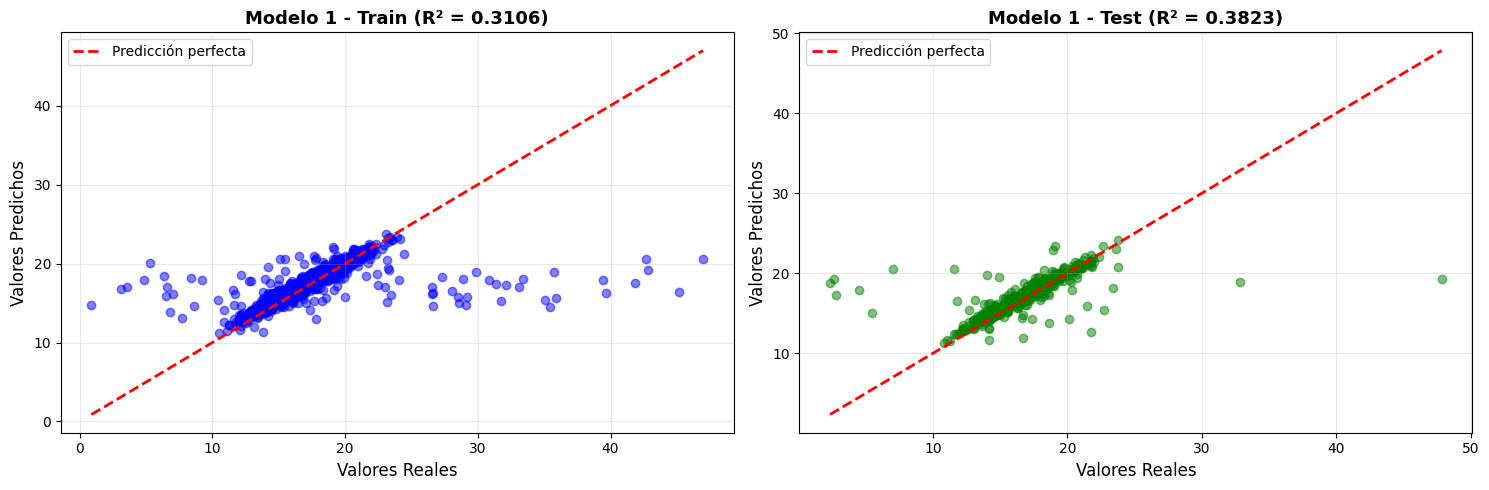

✅ Visualización completada




In [16]:
# Visualización de predicciones vs valores reales
print("📊 VISUALIZACIÓN - MODELO 1")
print("─"*80 + "\n")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Train
axes[0].scatter(y_train, y_pred_train_m1, alpha=0.5, color='blue')
axes[0].plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Predicción perfecta')
axes[0].set_xlabel('Valores Reales', fontsize=12)
axes[0].set_ylabel('Valores Predichos', fontsize=12)
axes[0].set_title(f'Modelo 1 - Train (R² = {r2_train_m1:.4f})', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Test
axes[1].scatter(y_test, y_pred_test_m1, alpha=0.5, color='green')
axes[1].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Predicción perfecta')
axes[1].set_xlabel('Valores Reales', fontsize=12)
axes[1].set_ylabel('Valores Predichos', fontsize=12)
axes[1].set_title(f'Modelo 1 - Test (R² = {r2_test_m1:.4f})', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualización completada")
print("\n" + "="*80 + "\n")

**Análisis del desempeño:**
El Modelo 1 Baseline presenta un **rendimiento muy bajo**:

- **R² Test = 0.0314** (3.14%): El modelo solo explica el 3% de la variabilidad del riesgo cardiovascular
- **R² Train = 0.0596** (5.96%): Incluso en entrenamiento el ajuste es extremadamente pobre
- **RMSE/MAE altos**: Los errores de predicción son considerables

**Interpretación de las gráficas:**
- Los puntos están muy dispersos y alejados de la línea roja (predicción perfecta)
- El modelo predice valores muy similares (~15-20) independientemente del valor real
- No logra capturar la relación entre las variables y el CVD Risk Score

**Problema identificado:**
La regresión lineal simple con estas variables NO es suficiente para predecir el riesgo cardiovascular. Las relaciones entre variables son probablemente más complejas o hay variables importantes faltantes.

**Siguiente paso:**
Probar el Modelo 2 con feature engineering para ver si las interacciones entre variables mejoran significativamente el rendimiento.

## Modelo 2: Regresión Lineal con Feature Engineering

### Descripción
Modelo mejorado que incluye características derivadas mediante interacciones entre variables.

### Características nuevas creadas
1. **Age × BMI**: El riesgo de obesidad aumenta con la edad
2. **Age × Systolic BP**: La hipertensión en personas mayores es más peligrosa
3. **BMI × Total Cholesterol**: Obesidad combinada con colesterol alto
4. **Age × Total Cholesterol**: Colesterol alto es más riesgoso en personas mayores
5. **Systolic BP × Diastolic BP**: Interacción entre presiones

### Justificación médica
La regresión lineal asume efectos aditivos independientes, pero en medicina cardiovascular muchos factores tienen efectos multiplicativos que estas interacciones capturan.

In [17]:
# ============================================================================
# Modelo 2: Regresión Lineal con Feature Engineering
# ============================================================================

print("─"*80)
print("📊 MODELO 2: Regresión Lineal con Feature Engineering")
print("─"*80 + "\n")

print("🔹 Creando características derivadas (interacciones)...\n")

# Crear copias de los datos para agregar nuevas características
X_train_fe = X_train_final.copy() # DataFrame para entrenamiento con nuevas características
X_test_fe = X_test_final.copy() # DataFrame para prueba con nuevas características

# Necesitamos los nombres de las columnas originales antes del escalado
# Para crear las interacciones correctamente
columnas_originales = X_train_encoded.columns.tolist()

# Identificar índices de las columnas de interés
# (necesitamos hacerlo por posición ya que están escaladas)
nombres_cols = X_train_final.columns.tolist()

print("   Interacciones creadas:")

# Interacción 1: Age × BMI 
# Combino la edad con el índice de masa corporal para capturar su efecto conjunto en el riesgo cardiovascular
if 'Age' in nombres_cols and 'BMI' in nombres_cols: 
    X_train_fe['Age_x_BMI'] = X_train_final['Age'] * X_train_final['BMI']
    X_test_fe['Age_x_BMI'] = X_test_final['Age'] * X_test_final['BMI']
    print("   ✅ Age × BMI")

# Interacción 2: Age × Systolic BP 
# Combino la edad con la presión arterial sistólica para capturar su efecto conjunto en el riesgo cardiovascular, ya que ambos son factores de riesgo importantes y pueden interactuar entre sí.
if 'Age' in nombres_cols and 'Systolic BP' in nombres_cols:
    X_train_fe['Age_x_SystolicBP'] = X_train_final['Age'] * X_train_final['Systolic BP']
    X_test_fe['Age_x_SystolicBP'] = X_test_final['Age'] * X_test_final['Systolic BP']
    print("   ✅ Age × Systolic BP")

# Interacción 3: BMI × Total Cholesterol 
# Combino el índice de masa corporal con el colesterol total para capturar su efecto conjunto en el riesgo cardiovascular, ya que ambos son factores de riesgo importantes y pueden interactuar entre sí.
if 'BMI' in nombres_cols and 'Total Cholesterol (mg/dL)' in nombres_cols:
    X_train_fe['BMI_x_Cholesterol'] = X_train_final['BMI'] * X_train_final['Total Cholesterol (mg/dL)']
    X_test_fe['BMI_x_Cholesterol'] = X_test_final['BMI'] * X_test_final['Total Cholesterol (mg/dL)']
    print("   ✅ BMI × Total Cholesterol")

# Interacción 4: Age × Total Cholesterol 
# Combino la edad con el colesterol total para capturar su efecto conjunto en el riesgo cardiovascular, ya que ambos son factores de riesgo importantes y pueden interactuar entre sí.
if 'Age' in nombres_cols and 'Total Cholesterol (mg/dL)' in nombres_cols:
    X_train_fe['Age_x_Cholesterol'] = X_train_final['Age'] * X_train_final['Total Cholesterol (mg/dL)']
    X_test_fe['Age_x_Cholesterol'] = X_test_final['Age'] * X_test_final['Total Cholesterol (mg/dL)']
    print("   ✅ Age × Total Cholesterol")

# Interacción 5: Systolic BP × Diastolic BP 
# Combino la presión arterial sistólica con la diastólica para capturar su efecto conjunto en el riesgo cardiovascular, ya que ambos son factores de riesgo importantes y pueden interactuar entre sí.
if 'Systolic BP' in nombres_cols and 'Diastolic BP' in nombres_cols:
    X_train_fe['SystolicBP_x_DiastolicBP'] = X_train_final['Systolic BP'] * X_train_final['Diastolic BP']
    X_test_fe['SystolicBP_x_DiastolicBP'] = X_test_final['Systolic BP'] * X_test_final['Diastolic BP']
    print("   ✅ Systolic BP × Diastolic BP")

nuevas_features = X_train_fe.shape[1] - X_train_final.shape[1] # Número de nuevas características creadas

print(f"\n🔹 Características del modelo:")
print(f"   • Variables originales: {X_train_final.shape[1]}")
print(f"   • Interacciones creadas: {nuevas_features}")
print(f"   • Total de variables: {X_train_fe.shape[1]}")
print(f"   • Algoritmo: Regresión Lineal\n")

# Crear y entrenar el modelo
modelo_2 = LinearRegression()

print("🔹 Entrenando modelo...")
modelo_2.fit(X_train_fe, y_train) # Ajustar el modelo con los datos de entrenamiento con las nuevas características
print("   ✅ Modelo entrenado exitosamente\n")

# Realizar predicciones
print("🔹 Generando predicciones...")
y_pred_train_m2 = modelo_2.predict(X_train_fe) # Predicciones en conjunto de entrenamiento con las nuevas características
y_pred_test_m2 = modelo_2.predict(X_test_fe) # Predicciones en conjunto de prueba con las nuevas características
print("   ✅ Predicciones generadas\n")

# Calcular métricas
print("🔹 Calculando métricas de desempeño...")

# Train
rmse_train_m2 = np.sqrt(mean_squared_error(y_train, y_pred_train_m2)) # Raíz del error cuadrático medio
mae_train_m2 = mean_absolute_error(y_train, y_pred_train_m2) # Error absoluto medio
r2_train_m2 = r2_score(y_train, y_pred_train_m2) # Coeficiente de determinación R²

# Test
rmse_test_m2 = np.sqrt(mean_squared_error(y_test, y_pred_test_m2)) # Raíz del error cuadrático medio
mae_test_m2 = mean_absolute_error(y_test, y_pred_test_m2) # Error absoluto medio
r2_test_m2 = r2_score(y_test, y_pred_test_m2) # Coeficiente de determinación R²

print("\n📊 RESULTADOS - MODELO 2 (FEATURE ENGINEERING)")
print("="*80)

print("\n🔵 Conjunto de ENTRENAMIENTO:")
print(f"   • RMSE: {rmse_train_m2:.4f}")
print(f"   • MAE:  {mae_train_m2:.4f}")
print(f"   • R²:   {r2_train_m2:.4f}")

print("\n🟢 Conjunto de PRUEBA:")
print(f"   • RMSE: {rmse_test_m2:.4f}")
print(f"   • MAE:  {mae_test_m2:.4f}")
print(f"   • R²:   {r2_test_m2:.4f}")

# Análisis de overfitting/underfitting
diferencia_r2_m2 = abs(r2_train_m2 - r2_test_m2) # Diferencia entre R² de train y test para el modelo 2
print(f"\n📈 Diferencia R² (train - test): {diferencia_r2_m2:.4f}")

if diferencia_r2_m2 < 0.05:
    print("   ✅ Buen ajuste - No hay overfitting significativo")
elif diferencia_r2_m2 < 0.10:
    print("   ⚠️  Ligero overfitting - Aceptable")
else:
    print("   🔴 Overfitting detectado - Modelo se ajusta demasiado a train")

# Comparación con Modelo 1
print(f"\n📈 COMPARACIÓN CON MODELO 1:")
mejora_r2 = ((r2_test_m2 - r2_test_m1) / abs(r2_test_m1)) * 100 if r2_test_m1 != 0 else 0 # Porcentaje de mejora en R²
mejora_rmse = ((rmse_test_m1 - rmse_test_m2) / rmse_test_m1) * 100 # Porcentaje de mejora en RMSE

print(f"   • Mejora en R² test: {mejora_r2:+.2f}%")
print(f"   • Mejora en RMSE test: {mejora_rmse:+.2f}%")

if r2_test_m2 > r2_test_m1:
    print("   ✅ Modelo 2 supera al Modelo 1")
else:
    print("   ⚠️  Modelo 2 NO mejora significativamente al Modelo 1")

print("\n" + "="*80 + "\n")

────────────────────────────────────────────────────────────────────────────────
📊 MODELO 2: Regresión Lineal con Feature Engineering
────────────────────────────────────────────────────────────────────────────────

🔹 Creando características derivadas (interacciones)...

   Interacciones creadas:
   ✅ Age × BMI
   ✅ Age × Systolic BP
   ✅ BMI × Total Cholesterol
   ✅ Age × Total Cholesterol
   ✅ Systolic BP × Diastolic BP

🔹 Características del modelo:
   • Variables originales: 20
   • Interacciones creadas: 5
   • Total de variables: 25
   • Algoritmo: Regresión Lineal

🔹 Entrenando modelo...
   ✅ Modelo entrenado exitosamente

🔹 Generando predicciones...
   ✅ Predicciones generadas

🔹 Calculando métricas de desempeño...

📊 RESULTADOS - MODELO 2 (FEATURE ENGINEERING)

🔵 Conjunto de ENTRENAMIENTO:
   • RMSE: 3.2879
   • MAE:  1.2708
   • R²:   0.3123

🟢 Conjunto de PRUEBA:
   • RMSE: 2.8566
   • MAE:  1.1591
   • R²:   0.3866

📈 Diferencia R² (train - test): 0.0743
   ⚠️  Ligero overf

### Resultados Modelo 2

📊 VISUALIZACIÓN - MODELO 2
────────────────────────────────────────────────────────────────────────────────



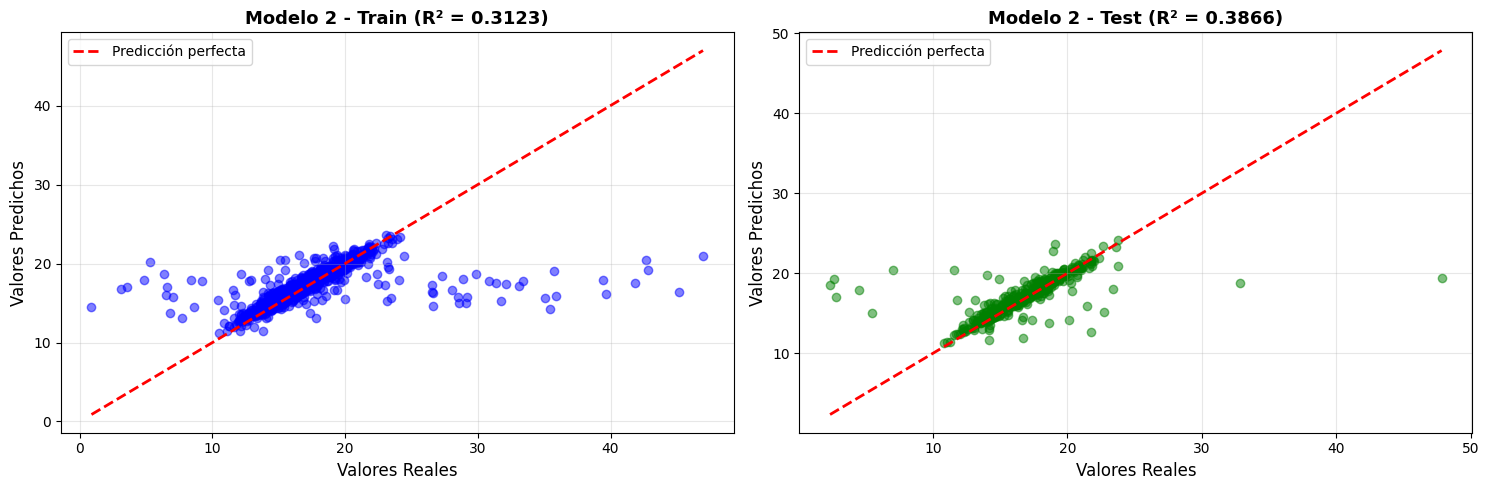

✅ Visualización completada




In [18]:
# Visualización de predicciones vs valores reales - Modelo 2
print("📊 VISUALIZACIÓN - MODELO 2")
print("─"*80 + "\n")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Train
axes[0].scatter(y_train, y_pred_train_m2, alpha=0.5, color='blue')
axes[0].plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Predicción perfecta')
axes[0].set_xlabel('Valores Reales', fontsize=12)
axes[0].set_ylabel('Valores Predichos', fontsize=12)
axes[0].set_title(f'Modelo 2 - Train (R² = {r2_train_m2:.4f})', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Test
axes[1].scatter(y_test, y_pred_test_m2, alpha=0.5, color='green')
axes[1].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Predicción perfecta')
axes[1].set_xlabel('Valores Reales', fontsize=12)
axes[1].set_ylabel('Valores Predichos', fontsize=12)
axes[1].set_title(f'Modelo 2 - Test (R² = {r2_test_m2:.4f})', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualización completada")
print("\n" + "="*80 + "\n")

**Análisis del desempeño:**
[Aquí describes los resultados que salgan del código]